1. Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer

2. Loading Dataset

In [2]:
heart_disease = fetch_ucirepo(id=45) 

data = pd.DataFrame(heart_disease.data.features)
data['target'] = heart_disease.data.targets

print(f'Shape of Heart Disease Dataset:{data.shape}\n')
print(data.head())

Shape of Heart Disease Dataset:(303, 14)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


3. Visualization of Feature Distributions

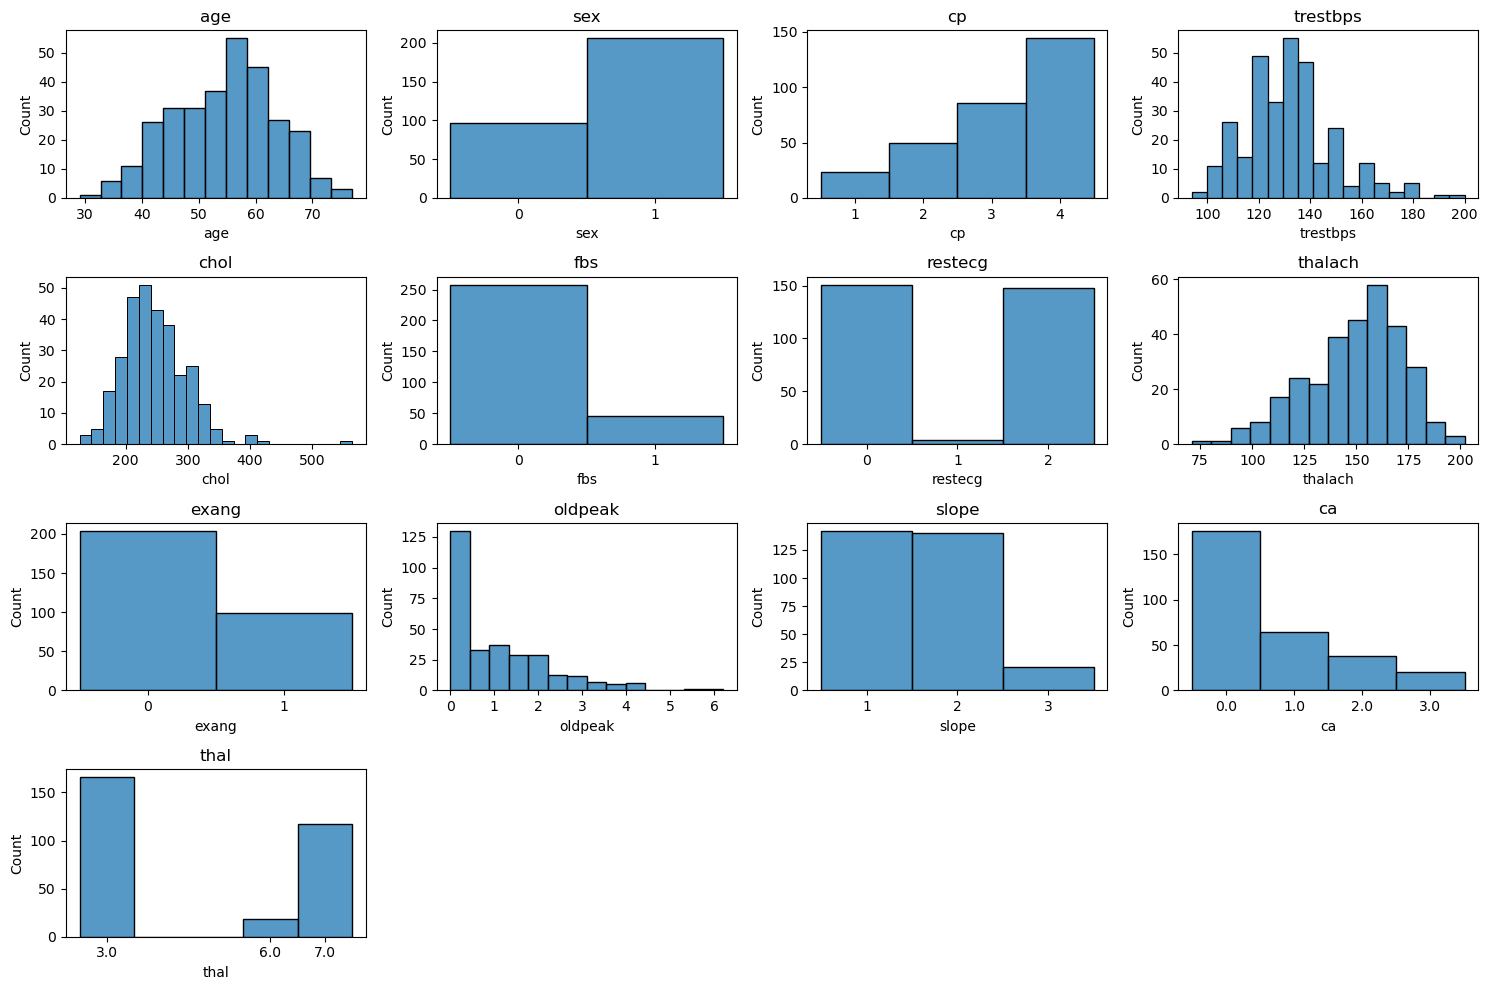

In [3]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 4, i)
    
    unique_values = data[col].dropna().unique()
    n_unique = len(unique_values)

    if n_unique <= 4:
        sns.histplot(data[col].dropna(), bins=n_unique, discrete=True, binwidth=0.4)
        plt.xticks(ticks=sorted(unique_values), labels=[x for x in sorted(unique_values)])
    else:
        sns.histplot(data[col].dropna())

    plt.title(col)

plt.tight_layout()
plt.savefig('figures/Features Distribution.png')
plt.show()
plt.close()

4. Visualization of Target Distribution

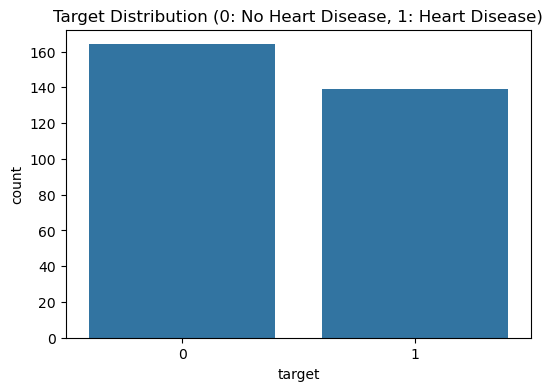

In [4]:
data['target'] = data['target'].apply(lambda x: 0 if x == 0 else 1)

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Target Distribution (0: No Heart Disease, 1: Heart Disease)')
plt.savefig('figures/Target Distribution.png')
plt.show()
plt.close()

5. Missing Data Processing

In [5]:
pd.set_option('future.no_silent_downcasting', True)


missing_cols = data.columns[data.isnull().any()].tolist()
if missing_cols:
    print(f'Features containing missing data: {missing_cols}\n')
    imputer = SimpleImputer(strategy='median')
    data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    print('Data imputed.\n')
else:
    data_imputed = data.copy()
    print('There is no missing data.\n')

data_imputed.head()

Features containing missing data: ['ca', 'thal']

Data imputed.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


6. Correlation Analysis

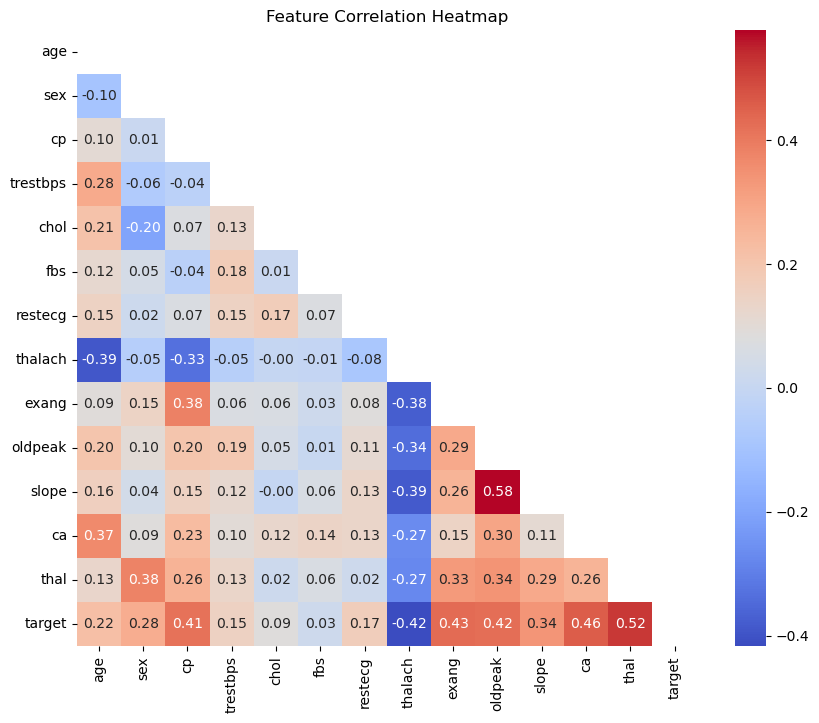

In [6]:
plt.figure(figsize=(10, 8))
corr = data_imputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.savefig('figures/Feature Correlation Heatmap.png')
plt.show()
plt.close()

7. Selecting Features

In [7]:
high_corr_features = corr['target'][abs(corr['target']) > 0.3].index.tolist()
high_corr = {feature: corr['target'][feature] for feature in high_corr_features}

sorted_high_corr = dict(sorted(high_corr.items(), key=lambda x: abs(x[1]), reverse=True))

for feature, value in sorted_high_corr.items():
    print(f'{feature}:{value:.3f}')

target:1.000
thal:0.522
ca:0.460
exang:0.432
oldpeak:0.425
thalach:-0.417
cp:0.414
slope:0.339


8. Storing Processed Data

In [8]:
data_imputed.to_csv('data/heart_disease_processed.csv', index=False)
print("Processed data stored as 'data/heart_disease_processed.csv'")

Processed data stored as 'data/heart_disease_processed.csv'
